In [1]:
import pandas as pd
import numpy as np

In [2]:
# Loading the dataset
df = pd.read_csv("flights_RUH.csv", na_values=['\\N'])

In [3]:
# Dropping all unnecessary columns
# More than 70% of aircraft.reg column is missing
# We will drop the column as it is not that volatile to our needs
df.drop(['aircraft.reg', 'aircraft.modeS', 'callSign', 'movement.scheduledTime.utc'], axis= 1, inplace= True)

In [4]:
# Verify changes
#df.head(10)

In [5]:
# Converting movement.scheduledTime.local column to type DateTime
df['movement.scheduledTime.local'] = pd.to_datetime(df['movement.scheduledTime.local'])

In [6]:
# Verify changes
#df.info()

In [7]:
# Make a shortcut for DateTime
dt_short = df['movement.scheduledTime.local'].dt

# Creating all new columns
df['Hour'] = dt_short.hour
#flight_dates['Day'] = dt_short.day # Pointless
df['Month'] = dt_short.month
df['Year'] = dt_short.year
# Bonus, substitute for ".day"
df['Weekday'] = dt_short.day_name() # Example: "Monday", "Tuesday", etc.

# Display results
df.head(10)

,flight_number,aircraft.model,airline.name,airline.iata,airline.icao,status,flight_type,codeshareStatus,isCargo,origin_airport_name,...,movement.quality,destination_airport_icao,destination_airport_iata,destination_airport_name,movement.airport.timeZone,movement.scheduledTime.local,Hour,Month,Year,Weekday
0,PF 769,Airbus A320,Air Sial,PF,NaN,Unknown,departure,Unknown,False,Riyadh,...,['Basic'],OPIS,ISB,Islamabad,Asia/Karachi,2025-03-15 00:01:00+03:00,0,3,2025,Saturday
1,XY 333,Airbus A320 NEO,flynas,XY,KNE,Unknown,departure,IsOperator,False,Riyadh,...,['Basic'],VILK,LKO,Lucknow,Asia/Kolkata,2025-03-15 00:05:00+03:00,0,3,2025,Saturday
2,QP 568,Boeing 737,Starlight Airline,QP,SLT,Unknown,departure,Unknown,False,Riyadh,...,['Basic'],VABB,BOM,Mumbai,Asia/Kolkata,2025-03-15 00:05:00+03:00,0,3,2025,Saturday
3,F3 161,Airbus A320,flyadeal,F3,FAD,Unknown,departure,Unknown,False,Riyadh,...,['Basic'],OEJN,JED,Jeddah,Asia/Riyadh,2025-03-15 00:10:00+03:00,0,3,2025,Saturday
4,KL 423,Airbus A330-300,KLM,KL,KLM,Unknown,departure,Unknown,False,Riyadh,...,['Basic'],OEDF,DMM,Ad Dammam,Asia/Riyadh,2025-03-15 00:15:00+03:00,0,3,2025,Saturday
5,SV 742,Boeing 777,Saudi Arabian,SV,SVA,Unknown,departure,IsOperator,False,Riyadh,...,['Basic'],VABB,BOM,Mumbai,Asia/Kolkata,2025-03-15 00:25:00+03:00,0,3,2025,Saturday
6,CZ 5008,Airbus A330,China Southern,CZ,CSN,Departed,departure,IsOperator,False,Riyadh,...,['Basic'],ZGSZ,SZX,Shenzhen,Asia/Shanghai,2025-03-15 00:30:00+03:00,0,3,2025,Saturday
7,SV 1845,Airbus A320,Saudi Arabian,SV,SVA,Unknown,departure,Unknown,False,Riyadh,...,['Basic'],OENG,EAM,Neyran,Asia/Riyadh,2025-03-15 00:30:00+03:00,0,3,2025,Saturday
8,SV 1011,Airbus A320,Saudi Arabian,SV,SVA,Unknown,departure,Unknown,False,Riyadh,...,['Basic'],OEJN,JED,Jeddah,Asia/Riyadh,2025-03-15 00:30:00+03:00,0,3,2025,Saturday
9,XY 61,Airbus A320 NEO,flynas,XY,KNE,Unknown,departure,Unknown,False,Riyadh,...,['Basic'],OEJN,JED,Jeddah,Asia/Riyadh,2025-03-15 00:35:00+03:00,0,3,2025,Saturday


## Quick Analysis

### Finding the busiest hours for departure & arrival.

#### *Busiest departure hours:*

In [8]:
# Extracting top 5 busy hours
busy_hours = df['Hour'].value_counts().head(5)

In [9]:
# Verifying
#busy_hours

In [10]:
# Filter for just departures
busy_dep_hours = df[df['flight_type'] == 'departure']['Hour'].value_counts().head(5) 

# Print results
print(f"Busiest departure hours: \n{busy_dep_hours}")

Busiest departure hours: 
Hour
16    4883
18    4181
11    4096
20    4063
9     3988
Name: count, dtype: int64


#### *Busiest arrival hours:*

In [11]:
# Filter for arrivals
busy_arr_hours = df[df['flight_type'] == 'arrival']['Hour'].value_counts().head(5)

# Print results
print(f"Busiest arrival hours: \n{busy_arr_hours}")

Busiest arrival hours: 
Hour
22    4350
19    4276
17    4268
14    4070
20    4068
Name: count, dtype: int64


### Finding the busiest month for departure & arrival.

#### *Busiest departure months:*

In [12]:
# Extracting top 5 busy days
busy_months = df['Month'].value_counts().head(5)

In [13]:
# Filter for just departures
busy_dep_months = df[df['flight_type'] == 'departure']['Month'].value_counts().head(5)

print(f"Top 5 busiest departure months: \n{busy_dep_months}")

Top 5 busiest departure months: 
Month
8    12332
7    12162
9    11536
5    11382
6    11012
Name: count, dtype: int64


In [14]:
# Filter for just arrivals
busy_arr_months = df[df['flight_type'] == 'arrival']['Month'].value_counts().head(5)

print(f"Top 5 busiest arrival months: \n{busy_arr_months}")

Top 5 busiest arrival months: 
Month
8    11710
7    11572
9    11215
6    10917
5    10695
Name: count, dtype: int64


### Finding Airline Market Share: 

In [15]:
# Extracting the top 10 highest flights count and their airlines
top_10= (df['airline.name'].value_counts(normalize= True).head(10) * 100).round(2)

# Calculating for other to get 100% 
others = 100 - top_10.sum()

# Add it to the series
airline_share = pd.concat([top_10, pd.Series({'Others': others})])

print(f"Airlines market share: \n{airline_share}")

Airlines market share: 
Saudi Arabian    39.71
flynas           22.14
flyadeal         16.20
Gulf Air          1.43
flydubai          1.34
EgyptAir          1.22
Qatar             1.18
Etihad            1.00
Emirates          0.89
Turkish           0.82
Others           14.07
dtype: float64


# Creating visual graphs

### We will be using plotly for interactive instead of basic matplotlib grpahs.

In [16]:
# Import plotly
import plotly.express as px

# Group and Count
hourly_counts = df.groupby(['Hour', 'flight_type']).size().reset_index(name= 'Counts')

# Plotting
fig_hourly = px.bar(
    hourly_counts,
    x= 'Hour',
    y= 'Counts',
    color= 'flight_type',
    labels={'flight_type': 'Flight Type'},
    barmode= 'group',
    title= "Rush Hour in the Sky: RUH Airport's Daily Rhythm",
    color_discrete_map={'departure': '#1a5f2a', 'arrival': '#4a9c5d'} # Adding cutom colors
)

# 1. Update the background color here
# 2. Customize legend, unnecessary since it was solved in .bar() but good practice
fig_hourly.update_layout(plot_bgcolor='white', legend_title_text = 'Flight Types')

fig_hourly.show()

In [17]:
# Plotly pie chart with hole makes it a donut
fig_market = px.pie(
    values= airline_share.values,
    names= airline_share.index,
    hole=0.3,  # This makes it a donut
    title = 'Top 10 Airlines Market Share'
)

fig_market.show()

In [18]:
# Checking the top 15 locations
top_destinations = df['destination_airport_name'].value_counts().head(15)
print(top_destinations)

# Fix Najran is misspelled as "Nayran"
df['destination_airport_name'] = df['destination_airport_name'].replace('Neyran', 'Najran')

destination_airport_name
Jeddah         27938
Dubai          12333
Cairo          10003
Abha            9043
Ad Dammam       7393
Medina          6563
Jazan           5196
Tabuk           4295
Istanbul        4083
Amman           3325
Taif            3317
Kuwait City     3088
Manama          3057
Doha            3038
Neyran          2739
Name: count, dtype: int64


In [19]:
# Making a dictionary of top 15 loactaions
airport_coords = {
    'Jeddah': (21.6609, 39.1733),
    'Dubai': (25.2528, 55.3644),
    'Cairo': (30.1160, 31.4172),
    #'Riyadh': (24.9594, 46.7011),  # Origin airport
    'Abha': (18.24028, 42.65667),
    'Ad Dammam': (26.4700, 49.7984),
    'Medina' : (24.5574, 39.7041),
    'Jazan': (16.9011, 42.5858),
    'Tabuk': (28.3721, 36.5986),
    'Istanbul': (41.2599, 28.7427),
    'Amman': (31.7217, 35.9965),
    'Taif': (40.5415, 21.4834),
    'Kuwait City': (29.2404, 47.9710),
    'Manama': (26.2708, 50.6336),
    'Doha': (25.2699, 51.6027),
    'Neyran': (17.6169, 44.4195)
}

In [20]:
import folium

# Adding RUH airport coordinates
RUH = [24.9594, 46.7011]

# Assign RUH airport as the center
m = folium.Map(location= [24.9594, 46.7011], zoom_start= 4)

folium.Marker(
    location= RUH,
    popup= 'Riyadh (RUH) - Origin',
    icon= folium.Icon(color= 'red', icon= 'plane')
).add_to(m)

In [39]:
# Looping through the rest of the airports
for city, coords in airport_coords.items():
    folium.Marker(
        location= coords,
        popup= city,
        icon= folium.Icon(color='blue')
    ).add_to(m)

    folium.PolyLine(
    locations= [RUH, coords],
    weight= 2,
    color= 'blue'
    ).add_to(m)

In [40]:
m

# ML forecasting

In [23]:
# Target column "movement.airport.timeZone"
df['is_domestic'] = (df['movement.airport.timeZone'] == 'Asia/Riyadh').astype(int)
df['is_domestic'].value_counts()

is_domestic
1    79413
0    73895
Name: count, dtype: int64

In [24]:
# 1. Define the features
features = ['airline.name', 'Hour', 'movement.terminal', 'aircraft.model', 'flight_type']

### Create a separate DataFrame

In [25]:
X = df[features].copy()

In [26]:
# Check it
X.head()

,airline.name,Hour,movement.terminal,aircraft.model,flight_type
0,Air Sial,0,2.0,Airbus A320,departure
1,flynas,0,1.0,Airbus A320 NEO,departure
2,Starlight Airline,0,3.0,Boeing 737,departure
3,flyadeal,0,5.0,Airbus A320,departure
4,KLM,0,1.0,Airbus A330-300,departure


In [27]:
# ML mdoels fail with NaN values, verify none exist in X
X = X.dropna()
X.isna().sum()

airline.name         0
Hour                 0
movement.terminal    0
aircraft.model       0
flight_type          0
dtype: int64

### Convert string columns to numbers for the ML to work with

In [28]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['airline.name', 'aircraft.model', 'flight_type']

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

X.head()

,airline.name,Hour,movement.terminal,aircraft.model,flight_type
0,10,0,2.0,3,1
1,56,0,1.0,5,1
2,48,0,3.0,19,1
3,54,0,5.0,3,1
4,29,0,1.0,11,1


In [29]:
print(X.shape)
print(X.dtypes)
X.head()

(152273, 5)
airline.name           int64
Hour                   int32
movement.terminal    float64
aircraft.model         int64
flight_type            int64
dtype: object


,airline.name,Hour,movement.terminal,aircraft.model,flight_type
0,10,0,2.0,3,1
1,56,0,1.0,5,1
2,48,0,3.0,19,1
3,54,0,5.0,3,1
4,29,0,1.0,11,1


In [30]:
# Defining y
y = df.loc[X.index, 'is_domestic']
print(y.shape)

(152273,)


### Splitting the data into training & testing sets (80/20 split)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 1. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

# 2. Create and train the model
model = RandomForestClassifier(random_state= 42)
model.fit(X_train, y_train)

# 3. Predict
y_pred = model.predict(X_test)

In [32]:
model

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Evaluating the model

### Running "Accuracy, Precision, Recall, F1-Score, and Confusion Matrix" to validate results

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9885
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     14743
           1       0.98      1.00      0.99     15712

    accuracy                           0.99     30455
   macro avg       0.99      0.99      0.99     30455
weighted avg       0.99      0.99      0.99     30455



In [34]:
print(confusion_matrix(y_test, y_pred))

[[14406   337]
 [   13 15699]]


# Feature Importance

### Let's see which features matter most.

In [35]:
import matplotlib.pyplot as plt

# Get feature importance
importance = model.feature_importances_
feature_names = X.columns

# Create a dataframe for easy viewing
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feat_imp = feat_imp.sort_values('Importance', ascending= False)

# Display results
print(feat_imp)

             Feature  Importance
2  movement.terminal    0.879595
0       airline.name    0.105151
1               Hour    0.010520
3     aircraft.model    0.002395
4        flight_type    0.002338


# Visualizing Feature Importance


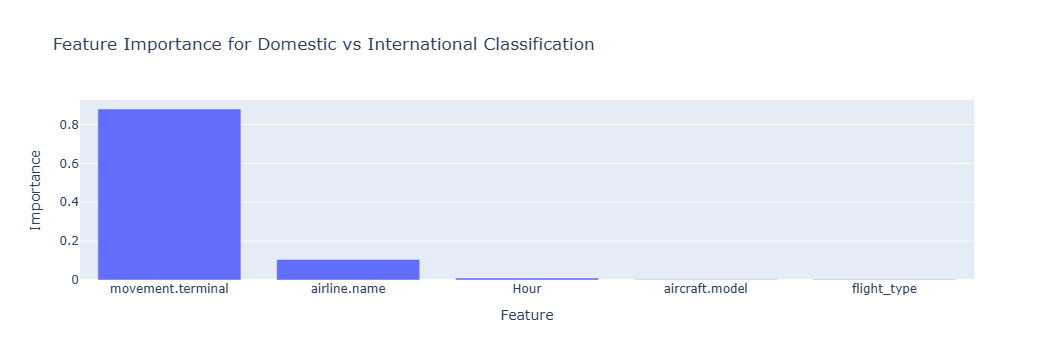

In [36]:
import plotly.express as px

fig_importance = px.bar(
    feat_imp,
    x= 'Feature',
    y= 'Importance',
    title= 'Feature Importance for Domestic vs International Classification',
)

fig_importance.update_layout(yaxis= {'categoryorder': 'total ascending'})
fig_importance.show()

# Making a Dashboard to wrap things up

In [37]:
from dash import Dash, html, dcc
import plotly.express as px

# Initializing the app
app = Dash(__name__)

app.layout = html.Div([
    # Header
    html.H1("King Khalid Airport Flight Analytics", 
            style={'textAlign': 'center', 'color': '#1a5f2a', 'marginBottom': '10px'}),
    html.P("Dashboard showing flight patterns at RUH (153K+ flights)", 
           style={'textAlign': 'center', 'color': '#666', 'marginBottom': '30px'}),
    
    # Row 1: Hourly chart (full width)
    html.Div([
        dcc.Graph(id='hourly-chart', figure=fig_hourly),
    ]),
    
    # Row 2: Market share and Feature importance (side by side)
    html.Div([
        html.Div([
            dcc.Graph(id='market-share-chart', figure=fig_market),
        ], style={'width': '50%', 'display': 'inline-block'}),
        
        html.Div([
            dcc.Graph(id='feature-importance-chart', figure=fig_importance),
        ], style={'width': '50%', 'display': 'inline-block'}),
    ]),
    
], style={'fontFamily': 'Arial, sans-serif', 'padding': '20px'})

# Running the app
if __name__ == '__main__':
    app.run(debug=True)

# Exporting garphs

In [38]:
fig_hourly.write_image("hourly_distribution.png")
fig_market.write_image("market_share.png")
fig_importance.write_image("feature_importance.png")